In [2]:
import scanpy as sc
import anndata
import numpy as np
from scipy import sparse
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import sys
sys.path.append("../../function/")
import scib_excerpts
import anndata2ri
import rpy2.robjects as ro
import rpy2.rinterface_lib.callbacks

In [4]:
adata_limb_embro = sc.read("../../unimportant_processed_data/4.11_limbEmbryo.h5ad")
adata_limb_adult = sc.read("../../unimportant_processed_data/4.11_limbAdult.h5ad")
adata_cranio = sc.read("../../unimportant_processed_data/4.11_cranio.h5ad")

/home/hanlitian/miniconda3/envs/py37/lib/python3.7/site-packages/anndata/compat/__init__.py:183: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,


In [32]:

savedir = "../result/4.12_normalize/"
path_cells_removed_data = "../../unimportant_processed_data//4.12_wt_cell_removed.h5ad"

In [5]:
adata_cranio.obs["batch"]=adata_cranio.obs["Sample"]

In [6]:
adata_limb_adult.X=adata_limb_adult.raw.X
adata_limb_embro.X=adata_limb_embro.raw.X
adata_cranio.X= adata_cranio.raw.X

In [7]:
cranioMeta=pd.read_csv("../../important_processed_data/4.11_cranioMeta.csv",index_col=0)
limbAdultMeta=pd.read_csv("../../important_processed_data/4.11_limbAdultMeta.csv",index_col=0)
limbEmbryoMeta=pd.read_csv("../../important_processed_data/4.11_limbEmbryoMeta.csv",index_col=0)


/home/hanlitian/miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (24,25,26,27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/hanlitian/miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (20,23,27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/hanlitian/miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (18,19,20,21,23,24,28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
adata_cranio

AnnData object with n_obs × n_vars = 104327 × 51432
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Core.Dataset', 'Limb.Atlas', 'Cranial.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Cre', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Cell.Count.After.QC', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'size_factors', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log', 'Cell_ID', 'V1', 'temp_cluster', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'leiden_clusters_level_3', 'leiden_clusters_level_4', 'leiden_clusters_level_5', 'batch', 'K2', 'K6', 'K12', 'K24', 'K53', '

In [9]:
cranioMeta

,orig.ident,nCount_originalexp,nFeature_originalexp,Sample,Project,Core.Dataset,Limb.Atlas,Cranial.Atlas,Organ,Tissue,...,C2,C6,C12,C21,C41,C2_named,C6_named,C12_named,C21_named,C41_named
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1,Suture2021_Farmer_E17,11668.0,3222,Suture2021_Farmer_E17,Suture2021_Farmer,True,False,True,Head,Suture mesenchyme,...,C2-1,C6-1,C12-1,C21-1,C41-1,C2-1,C6-1,C12-1,C21-1,C41-1
Suture2021_Farmer_E17_AAACCTGGTGCGGTAA-1_1,Suture2021_Farmer_E17,14744.0,3910,Suture2021_Farmer_E17,Suture2021_Farmer,True,False,True,Head,Suture mesenchyme,...,C2-1,C6-2,C12-8,C21-15,C41-32,C2-1,C6-2,C12-8,C21-15,C41-32
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1,Suture2021_Farmer_E17,14962.0,3533,Suture2021_Farmer_E17,Suture2021_Farmer,True,False,True,Head,Suture mesenchyme,...,C2-1,C6-1,C12-1,C21-2,C41-2,C2-1,C6-1,C12-1,C21-2,C41-2
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1,Suture2021_Farmer_E17,14473.0,3565,Suture2021_Farmer_E17,Suture2021_Farmer,True,False,True,Head,Suture mesenchyme,...,C2-2,C6-6,C12-12,C21-21,C41-40,C2-2,C6-6,C12-12,C21-21,C41-40
Suture2021_Farmer_E17_AAACCTGTCGTTACGA-1_1,Suture2021_Farmer_E17,14249.0,3968,Suture2021_Farmer_E17,Suture2021_Farmer,True,False,True,Head,Suture mesenchyme,...,C2-1,C6-1,C12-2,C21-4,C41-6,C2-1,C6-1,C12-2,C21-4,C41-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mandible2020_Chai_E12_TTTGTCATCGCTGATA_2,Mandible2020_Chai_E12,4747.0,1283,Mandible2020_Chai_E12,Mandible2020_Chai,False,False,True,Head,Mandible mesenchyme,...,C2-1,C6-1,C12-4,C21-7,C41-11,C2-1,C6-1,C12-4,C21-7,C41-11
Mandible2020_Chai_E12_TTTGTCATCGCTTGTC_2,Mandible2020_Chai_E12,7912.0,2192,Mandible2020_Chai_E12,Mandible2020_Chai,False,False,True,Head,Mandible mesenchyme,...,C2-1,C6-1,C12-6,C21-12,C41-29,C2-1,C6-1,C12-6,C21-12,C41-29
Mandible2020_Chai_E12_TTTGTCATCTCGGACG_2,Mandible2020_Chai_E12,5512.0,1482,Mandible2020_Chai_E12,Mandible2020_Chai,False,False,True,Head,Mandible mesenchyme,...,C2-1,C6-1,C12-6,C21-13,C41-28,C2-1,C6-1,C12-6,C21-13,C41-28
Mandible2020_Chai_E12_TTTGTCATCTGCGTAA_2,Mandible2020_Chai_E12,5572.0,1564,Mandible2020_Chai_E12,Mandible2020_Chai,False,False,True,Head,Mandible mesenchyme,...,C2-1,C6-1,C12-6,C21-12,C41-27,C2-1,C6-1,C12-6,C21-12,C41-27


In [10]:
adata_limb_embro.obs=limbEmbryoMeta
adata_cranio.obs=cranioMeta
adata_limb_adult.obs=limbAdultMeta

In [11]:
adata=adata_cranio.concatenate(adata_limb_embro,adata_limb_adult,
                               batch_key="batch_atlas",join="outer")

In [10]:
del adata.obsm

In [11]:
adata.obs.to_csv('../../unimportant_processed_data/4.11_adata_meta.csv')

In [17]:
adata.obs

,orig.ident,nCount_originalexp,nFeature_originalexp,Sample,Project,Core.Dataset,Limb.Atlas,Cranial.Atlas,Organ,Tissue,...,K65,C17,C36,C5,percent_mito,percent_ribo,C5_named,C17_named,C36_named,batch_atlas
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0,Suture2021_Farmer_E17,11668.0,3222,Suture2021_Farmer_E17,Suture2021_Farmer,True,False,True,Head,Suture mesenchyme,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Suture2021_Farmer_E17_AAACCTGGTGCGGTAA-1_1-0,Suture2021_Farmer_E17,14744.0,3910,Suture2021_Farmer_E17,Suture2021_Farmer,True,False,True,Head,Suture mesenchyme,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0,Suture2021_Farmer_E17,14962.0,3533,Suture2021_Farmer_E17,Suture2021_Farmer,True,False,True,Head,Suture mesenchyme,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0,Suture2021_Farmer_E17,14473.0,3565,Suture2021_Farmer_E17,Suture2021_Farmer,True,False,True,Head,Suture mesenchyme,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Suture2021_Farmer_E17_AAACCTGTCGTTACGA-1_1-0,Suture2021_Farmer_E17,14249.0,3968,Suture2021_Farmer_E17,Suture2021_Farmer,True,False,True,Head,Suture mesenchyme,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGACTGTATTTCCT-1_5-1-2,Metaphysis_Yang_sorted,11255.0,3122,Metaphysis_Yang_sorted,Metaphysis_Yang,NaN,True,NaN,Limb,Femur;Tibia,...,K65-36,C17-2,C36-4,C5-1,19.271435,7.596624,C5-1,C17-2,C36-4,2
TTTGACTGTTGCATTG-1_5-1-2,Metaphysis_Yang_sorted,2748.0,1298,Metaphysis_Yang_sorted,Metaphysis_Yang,NaN,True,NaN,Limb,Femur;Tibia,...,K65-44,C17-2,C36-4,C5-1,0.254731,19.395924,C5-1,C17-2,C36-4,2
TTTGACTTCTTGGGCG-1_5-1-2,Metaphysis_Yang_sorted,18312.0,4340,Metaphysis_Yang_sorted,Metaphysis_Yang,NaN,True,NaN,Limb,Femur;Tibia,...,K65-40,C17-13,C36-26,C5-5,8.480778,12.549148,C5-5,C17-13,C36-26,2
TTTGGAGCAGCGACAA-1_5-1-2,Metaphysis_Yang_sorted,70471.0,6264,Metaphysis_Yang_sorted,Metaphysis_Yang,NaN,True,NaN,Limb,Femur;Tibia,...,K65-7,C17-1,C36-2,C5-1,3.740546,17.427027,C5-1,C17-1,C36-2,2


In [18]:
df = adata.obs
# select only the categorical columns
categorical_columns = df.select_dtypes(include=['category']).columns.tolist()

# iterate through each categorical column and add new categories and fill missing values
for column in categorical_columns:
    new_categories = df[column].cat.categories.tolist() + ['']
    new_category_column = pd.Categorical(df[column], categories=new_categories)
    df[column] = new_category_column
    df[column].fillna("", inplace=True)
    
df.fillna("", inplace=True)
objectColumn=adata.obs.select_dtypes(include=['object']).columns.tolist()
df = df.drop(columns=objectColumn)
adata.obs=df

In [23]:
adata.obs=df

In [35]:
adata.obs["Core.Dataset"].unique()

array([True, False, ''], dtype=object)

In [41]:
adata.obs=df

In [42]:
adata.write_h5ad("../../important_processed_data/4.11_wt_adata_merge.h5ad")

In [2]:
adata=sc.read("../../important_processed_data/4.11_wt_adata_merge.h5ad")

In [3]:
 if not sparse.issparse(adata.X): # quick fix: HVG doesn't work on dense mtx
        adata.X = sparse.csr_matrix(adata.X)

In [ ]:
n_pcs=50
counts_per_cell = 1e4
louvain_r=0.5
log_transform=False
anndata2ri.activate()
ro.r('library("scran")')
    
    # keep raw counts
adata.layers["counts"] = adata.X.copy()
    
    # Preliminary clustering for differentiated normalisation
adata_pp = adata.copy()
sc.pp.normalize_per_cell(adata_pp, counts_per_cell_after=counts_per_cell)
sc.pp.log1p(adata_pp)
sc.pp.pca(adata_pp, n_comps=n_pcs, svd_solver='arpack')
sc.pp.neighbors(adata_pp)
sc.tl.louvain(adata_pp, key_added='groups', resolution=louvain_r)  

ro.globalenv['data_mat'] = adata.X.T
ro.globalenv['input_groups'] = adata_pp.obs['groups']
size_factors = ro.r('sizeFactors(computeSumFactors(SingleCellExperiment('
                            'list(counts=data_mat)), clusters = input_groups,'
                            f' min.mean = {0.1}))')

R[write to console]: 载入需要的程辑包：SingleCellExperiment

R[write to console]: 载入需要的程辑包：SummarizedExperiment

R[write to console]: 载入需要的程辑包：MatrixGenerics

R[write to console]: 载入需要的程辑包：matrixStats

R[write to console]: 
载入程辑包：‘MatrixGenerics’


R[write to console]: The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, 

In [9]:
del adata_pp

In [10]:
adata.obs['size_factors'] = size_factors
sizeTable=adata.obs
sizeTable.to_csv("../result/4.11_size_table.csv")

In [4]:
sizeTable= pd.read_csv("../result/4.11_size_table.csv",index_col=0)
adata.obs=sizeTable

/home/hanlitian/miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (17,18,19,20,22,23,24,27,30,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,54,55,56,57,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
chunk_size = 30000  # Set the size of each chunk
n_chunks = int(np.ceil(adata.X.shape[0] / chunk_size))  # Calculate the number of chunks

In [ ]:
# Loop over the chunks and process each one separately
for i in range(n_chunks):
    start_idx = i * chunk_size
    end_idx = min(start_idx + chunk_size, adata.X.shape[0])
    chunk = adata.X[start_idx:end_idx, :]
    chunk /= adata.obs['size_factors'].values[start_idx:end_idx, np.newaxis]
    adata.X[start_idx:end_idx, :] = sparse.csr_matrix(chunk)

In [8]:
adata

AnnData object with n_obs × n_vars = 274675 × 62934
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Cre', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'temp_cluster', 'batch', 'K2', 'K6', 'K12', 'K24', 'K53', 'K2.1', 'K6.1', 'K12.1', 'K24.1', 'K53.1', 'K2.2', 'K6.2', 'K12.2', 'K24.2', 'K53.2', 'K2.3', 'K6.3', 'K12.3', 'K24.3', 'K53.3', 'C2', 'C6', 'C12', 'C21', 'C41', 'C2_named', 'C6_named', 'C12_named', 'C21_named', 'C41_named', 'K4', 'K11', 'K25', 'K57', 'C4', 'C9', 'C22', 'C42', 'C4_named', 'C9_named', 'C22_named', 'C42_named', 'K5', 'K19', 'K65', 'C17', 'C36', 'C5', 'C5_named', 'C17_named', 'C36_named', 'batch_atlas', 'size_factors'
    var: 'featur

In [9]:
adata.X[1:10,1:10].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.71645784,
        0.        , 0.        , 0.71645784, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.8040723 , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.7865965 , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.3778985 ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.4586262 ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.1899462 , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.2220713 ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.2023346 , 0.        ],


In [10]:
adata.write_h5ad("../../unimportant_processed_data/4.12_wt_adata_merge_normalized.h5ad")

/home/hanlitian/miniconda3/envs/py37/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'orig.ident' as categorical
/home/hanlitian/miniconda3/envs/py37/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Sample' as categorical
/home/hanlitian/miniconda3/envs/py37/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be re

... storing 'Origin' as categorical
/home/hanlitian/miniconda3/envs/py37/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'paper_label' as categorical
/home/hanlitian/miniconda3/envs/py37/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'coarse_label' as categorical
/home/hanlitian/miniconda3/envs/py37/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reor

... storing 'K2.3' as categorical
/home/hanlitian/miniconda3/envs/py37/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'K6.3' as categorical
/home/hanlitian/miniconda3/envs/py37/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'K12.3' as categorical
/home/hanlitian/miniconda3/envs/py37/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories i

... storing 'C22' as categorical
/home/hanlitian/miniconda3/envs/py37/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'C42' as categorical
/home/hanlitian/miniconda3/envs/py37/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'C4_named' as categorical
/home/hanlitian/miniconda3/envs/py37/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories 

In [12]:
adata.X[0, :30].toarray() * adata.obs.size_factors[0]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [71]:
adata.X[1:5,1:10].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.54026276,
        0.        , 0.        , 0.54026276, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.5900465 , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.5803124 , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.8662171 ,
        0.        , 0.        , 0.        , 0.        ]], dtype=float32)

In [69]:
adata.layers["counts"] = adata.raw.X.copy()

In [70]:
adata.layers["counts"][1:5,1:10].toarray()

array([[0., 0., 0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 2., 0., 0., 0., 0.]], dtype=float32)

In [30]:
color_map

{'Suture2021_Farmer': (0.4, 0.7607843137254902, 0.6470588235294118),
 'CranioSoxc_Angelozzi': (0.9882352941176471,
  0.5529411764705883,
  0.3843137254901961),
 'CalvariaP4_Ayturk': (0.5529411764705883,
  0.6274509803921569,
  0.796078431372549),
 'Mandible2020_Chai': (0.9058823529411765,
  0.5411764705882353,
  0.7647058823529411),
 'Frontal_Holmes': (0.6509803921568628,
  0.8470588235294118,
  0.32941176470588235),
 'Maxillary_Bian': (1.0, 0.8509803921568627, 0.1843137254901961),
 'Mesenchymal2022_Zhang': (0.8980392156862745,
  0.7686274509803922,
  0.5803921568627451),
 'lambdoid_Holmes': (0.7019607843137254,
  0.7019607843137254,
  0.7019607843137254),
 'sagittal_Holmes': (0.4, 0.7607843137254902, 0.6470588235294118),
 'coronal_Holmes': (0.9882352941176471,
  0.5529411764705883,
  0.3843137254901961),
 'ChondroOsteo_Long': (0.5529411764705883,
  0.6274509803921569,
  0.796078431372549),
 'Forelimb_He': (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 'LimbG610C_Gorrel

In [28]:
gb_values = sns.color_palette("Set2", 26)
color_labels = adata.obs["Project"].unique()
color_map = dict(zip(color_labels, gb_values))
sc.pp.calculate_qc_metrics(adata, inplace=True, layer="counts")

In [24]:
adata.obs.total_counts

Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0    11607.707031
Suture2021_Farmer_E17_AAACCTGGTGCGGTAA-1_1-0    10563.455078
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0    12030.528320
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0    11384.409180
Suture2021_Farmer_E17_AAACCTGTCGTTACGA-1_1-0     9816.837891
                                                    ...     
TTTGACTGTATTTCCT-1_5-1-2                        11056.024414
TTTGACTGTTGCATTG-1_5-1-2                         9310.576172
TTTGACTTCTTGGGCG-1_5-1-2                         9968.770508
TTTGGAGCAGCGACAA-1_5-1-2                        17268.912109
TTTGGTTCACTACTTT-1_5-1-2                        14046.646484
Name: total_counts, Length: 274675, dtype: float32

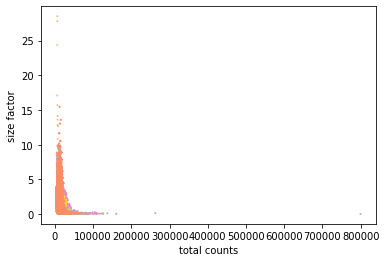

In [31]:
plt.scatter(
    adata.obs.total_counts,
    adata.obs.size_factors,
    c=list(map(lambda x: color_map.get(x), adata.obs["Project"].values)),
    s=1,
)
plt.xlabel("total counts")
plt.ylabel("size factor")
plt.show()

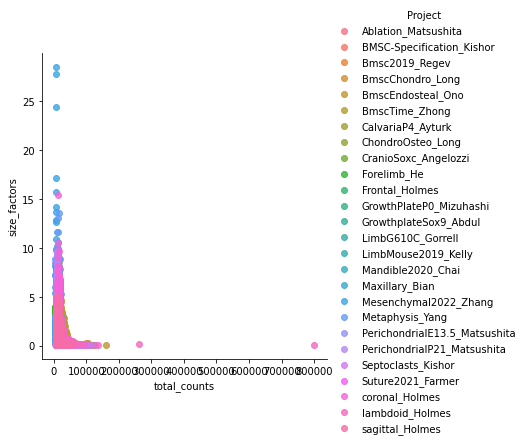

In [33]:
sns.lmplot(
    x="total_counts",
    y="size_factors",
    data=adata.obs,
    hue="Project",
    fit_reg=False,
)
plt.savefig(f"{savedir}/qc_sizefactor_count.pdf")
plt.show()


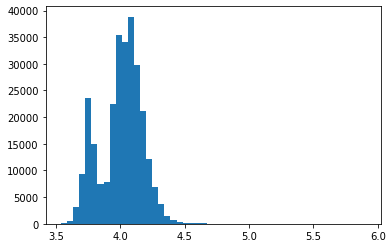

In [34]:
new_totals = np.array(np.sum(adata.X, axis=1))
plt.hist(np.log10(new_totals), bins=50)
plt.savefig(f"{savedir}/qc_count_barplot")
plt.show()

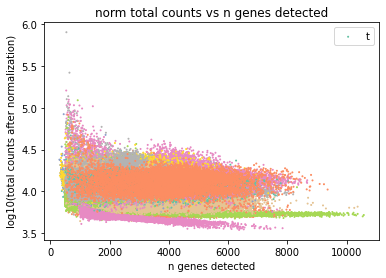

In [35]:
plt.scatter(
    adata.obs.n_genes_by_counts.values,
    np.log10(new_totals),
    s=1,
    c=list(map(lambda x: color_map.get(x), adata.obs["Project"].values)),
)


plt.xlabel("n genes detected")
plt.ylabel("log10(total counts after normalization)")
plt.title("norm total counts vs n genes detected")
plt.legend(labels="test")

plt.show()

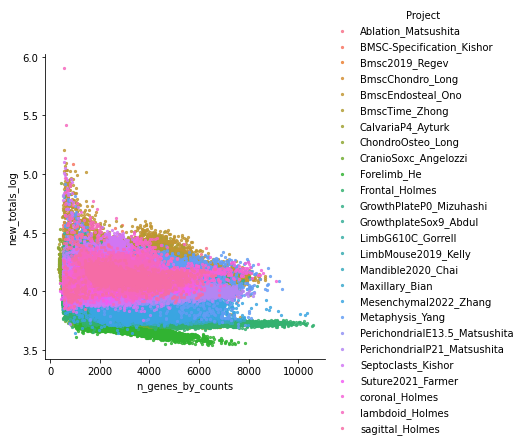

In [36]:
plotdf = adata.obs
plotdf["new_totals_log"] = np.log10(new_totals)
sns.lmplot(
    x="n_genes_by_counts",
    y="new_totals_log",
    data=plotdf,
    hue="Project",
    fit_reg=False,
    scatter_kws={"s": 5},
)
plt.savefig(f"{savedir}/qc_count_genedetect.pdf")
plt.show()

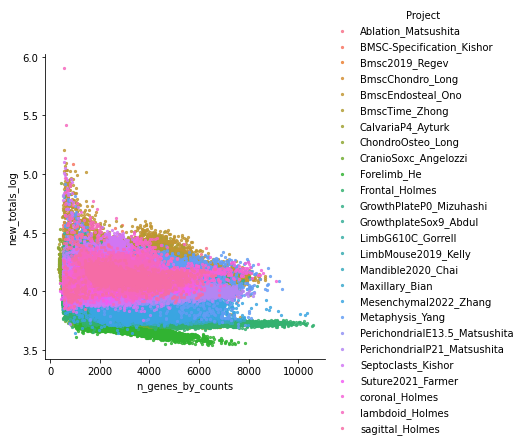

In [37]:
plotdf = adata.obs
plotdf["new_totals_log"] = np.log10(new_totals)
sns.lmplot(
    x="n_genes_by_counts",
    y="new_totals_log",
    data=plotdf,
    hue="Project",
    fit_reg=False,
    scatter_kws={"s": 5},
)
plt.savefig(f"{savedir}/qc_count_genedetect.pdf")
plt.show()

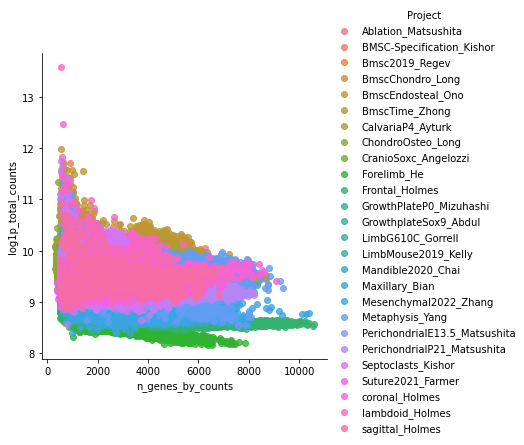

In [38]:
sns.lmplot(
    x="n_genes_by_counts",
    y="log1p_total_counts",
    data=adata.obs,
    hue="Project",
    fit_reg=False,
)
plt.savefig(f"{savedir}/qc_count_genedetect2.pdf")
plt.show()

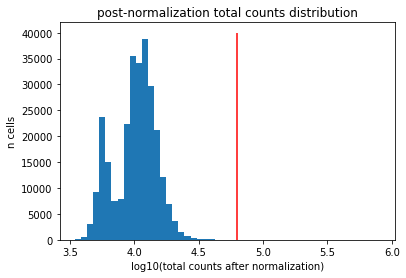

In [40]:
plt.hist(np.log10(new_totals), bins=50)
plt.xlabel("log10(total counts after normalization)")
plt.ylabel("n cells")
plt.vlines(x=4.8, ymin=0, ymax=40000, color="red")
plt.title("post-normalization total counts distribution")
plt.show()

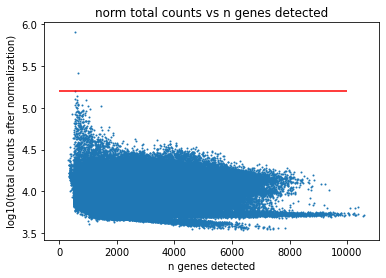

In [43]:
plt.scatter(
    adata.obs.n_genes_by_counts.values,
    np.log10(new_totals),
    s=1,
)
plt.hlines(y=5.2,xmin=0, xmax=10000, color="red")
plt.xlabel("n genes detected")
plt.ylabel("log10(total counts after normalization)")
plt.title("norm total counts vs n genes detected")
plt.show()

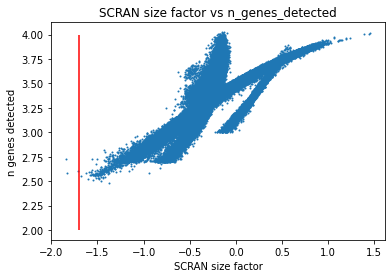

In [46]:
plt.scatter(
    np.log10(adata.obs.size_factors), np.log10(adata.obs.n_genes_by_counts), s=1
)
plt.vlines(x=np.log10(0.02), ymin=2, ymax=4, color="red")
plt.xlabel("SCRAN size factor")
plt.ylabel("n genes detected")
plt.title("SCRAN size factor vs n_genes_detected")
plt.show()

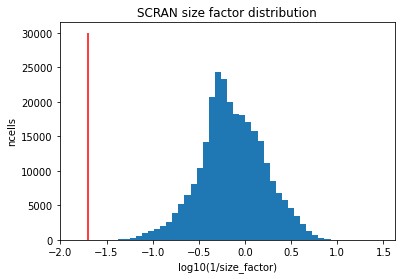

In [47]:
plt.hist(np.log10(adata.obs.size_factors), bins=50)
plt.xlabel("log10(1/size_factor)")
plt.ylabel("ncells")
plt.vlines(x=np.log10(0.02), ymin=0, ymax=30000, color="red")
plt.title("SCRAN size factor distribution")
plt.show()

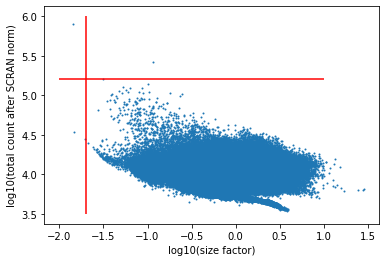

In [50]:
plt.scatter(np.log10(adata.obs.size_factors.values), np.log10(new_totals), s=1)
plt.vlines(x=np.log10(0.02), ymin=3.5, ymax=6, color="red")
plt.hlines(y=5.2, xmin=-2, xmax=1, color="red")
plt.xlabel("log10(size factor)")
plt.ylabel("log10(total count after SCRAN norm)")
plt.show()

In [51]:
cells_to_filter_out = adata[
    [
        norm_total_count_filter or sf_filter
        for norm_total_count_filter, sf_filter in zip(
            (new_totals > 10**5.2).flatten().tolist(), adata.obs.size_factors < 0.02
        )
    ],
    :,
].copy()

In [52]:
cells_to_filter_out

AnnData object with n_obs × n_vars = 5 × 62934
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Cre', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'temp_cluster', 'batch', 'K2', 'K6', 'K12', 'K24', 'K53', 'K2.1', 'K6.1', 'K12.1', 'K24.1', 'K53.1', 'K2.2', 'K6.2', 'K12.2', 'K24.2', 'K53.2', 'K2.3', 'K6.3', 'K12.3', 'K24.3', 'K53.3', 'C2', 'C6', 'C12', 'C21', 'C41', 'C2_named', 'C6_named', 'C12_named', 'C21_named', 'C41_named', 'K4', 'K11', 'K25', 'K57', 'C4', 'C9', 'C22', 'C42', 'C4_named', 'C9_named', 'C22_named', 'C42_named', 'K5', 'K19', 'K65', 'C17', 'C36', 'C5', 'C5_named', 'C17_named', 'C36_named', 'batch_atlas', 'size_factors', 'n_genes_by_counts',

In [53]:
cells_to_filter_out.obs.Project.value_counts()

ChondroOsteo_Long    2
lambdoid_Holmes      2
BmscEndosteal_Ono    1
Name: Project, dtype: int64

In [54]:
cells_to_filter_out.obs.coarse_label.value_counts()

Chondrocytes    5
Name: coarse_label, dtype: int64

In [55]:
# store cells that are filtered out:
cells_to_filter_out.write(path_cells_removed_data)

In [56]:
filter_boolean = ~adata.obs.index.isin(cells_to_filter_out.obs.index)
adata = adata[filter_boolean, :].copy()

In [57]:
adata.write("../../unimportant_processed_data/4.12_wt_integrate_SCRAN_filtered.h5ad")

In [58]:
# function to calculate variances on *sparse* matrix
def vars(a, axis=None):
    """ Variance of sparse matrix a
    var = mean(a**2) - mean(a)**2
    """
    a_squared = a.copy()
    a_squared.data **= 2
    return a_squared.mean(axis) - np.square(a.mean(axis))

/home/hanlitian/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


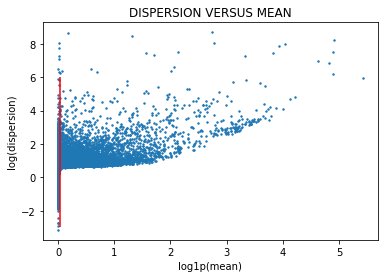

In [59]:
means = np.mean(adata.X, axis=0)
variances = vars(adata.X, axis=0)
dispersions = variances / means
min_mean = 0.03
# plot mean versus dispersion plot:
# now plot
plt.scatter(
    np.log1p(means).tolist()[0], np.log(dispersions).tolist()[0], s=2
)
plt.vlines(x=np.log1p(min_mean),ymin=-3,ymax=6,color='red')
plt.xlabel("log1p(mean)")
plt.ylabel("log(dispersion)")
plt.title("DISPERSION VERSUS MEAN")
plt.show()

In [ ]:
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, batch_key="Sample",min_mean=min_mean, flavor="cell_ranger",n_top_genes=2000)

In [72]:
path_output_data = "../../important_processed_data//4.12_wt_integrate_SCRAN_log1p.h5ad"
adata.write(path_output_data)